In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [3]:
torch.__version__

'2.4.1+cu124'

In [4]:
from pathlib import Path
import requests
import zipfile

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if data_path.is_dir():
    print("Data sudah ada")
else:
    image_path.mkdir(exist_ok=True, parents=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        print("Download data....")
        res = requests.get(
            "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
        )
        f.write(res.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Extract data...")
        zip_ref.extractall(path=image_path)

Data sudah ada


In [5]:
import os
def walk_through_dir(dir_path):
    
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [6]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data\pizza_steak_sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\test
there are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
there are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
there are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\train
there are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
there are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
there are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Image CLass : steak
Image Width : 512
Image height : 512


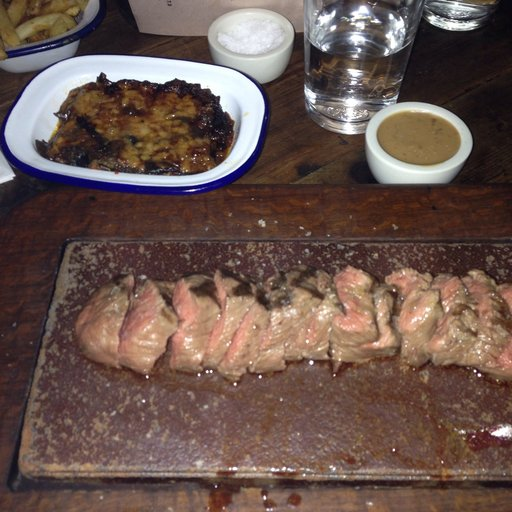

In [8]:
import random
from PIL import Image

# random.seed(42)

image_path_list  = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem


img = Image.open(random_image_path)
print(f"Image CLass : {image_class}")
print(f"Image Width : {img.width}")
print(f"Image height : {img.height}")

img

Image classsteak, Image shape: (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

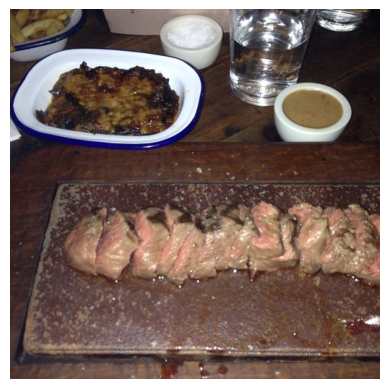

In [9]:
import numpy as np
image_array = np.asarray(img)

plt.imshow(image_array)
print(f"Image class{image_class}, Image shape: {image_array.shape}")
plt.axis(False)

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import  torchvision.transforms.v2 as transforms 

In [11]:
data_transform = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.Resize(size=(128, 128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToDtype(torch.float32,scale=True),
    ]
)

In [12]:
data_transform(Image.open(random_image_path))

Image([[[0.0353, 0.0392, 0.0471,  ..., 0.2157, 0.1843, 0.2275],
        [0.0353, 0.0392, 0.0392,  ..., 0.3176, 0.2275, 0.2745],
        [0.0392, 0.0392, 0.0353,  ..., 0.4039, 0.2941, 0.3373],
        ...,
        [0.3451, 0.3569, 0.3647,  ..., 0.3294, 0.3255, 0.2863],
        [0.3490, 0.3569, 0.3569,  ..., 0.3059, 0.3176, 0.2980],
        [0.3333, 0.3451, 0.3686,  ..., 0.2863, 0.3020, 0.2902]],

       [[0.0314, 0.0314, 0.0353,  ..., 0.1451, 0.1294, 0.1647],
        [0.0314, 0.0353, 0.0314,  ..., 0.2392, 0.1569, 0.2039],
        [0.0275, 0.0314, 0.0314,  ..., 0.3216, 0.2196, 0.2667],
        ...,
        [0.2431, 0.2471, 0.2510,  ..., 0.2275, 0.2157, 0.1804],
        [0.2392, 0.2431, 0.2431,  ..., 0.2078, 0.2118, 0.1961],
        [0.2118, 0.2235, 0.2549,  ..., 0.2000, 0.2118, 0.2039]],

       [[0.0667, 0.0588, 0.0549,  ..., 0.1020, 0.1059, 0.1216],
        [0.0627, 0.0588, 0.0510,  ..., 0.1725, 0.1137, 0.1373],
        [0.0549, 0.0549, 0.0510,  ..., 0.2196, 0.1294, 0.1647],
        ..

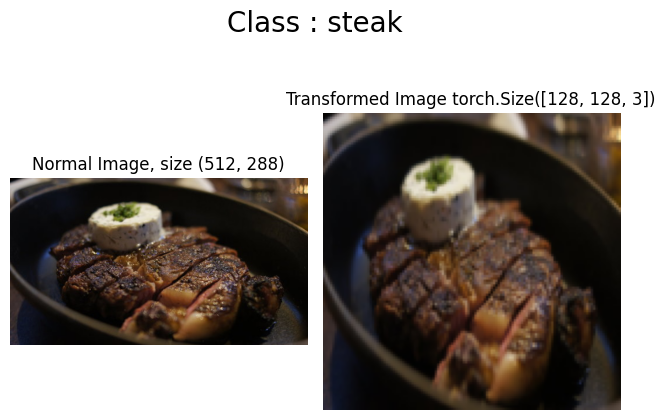

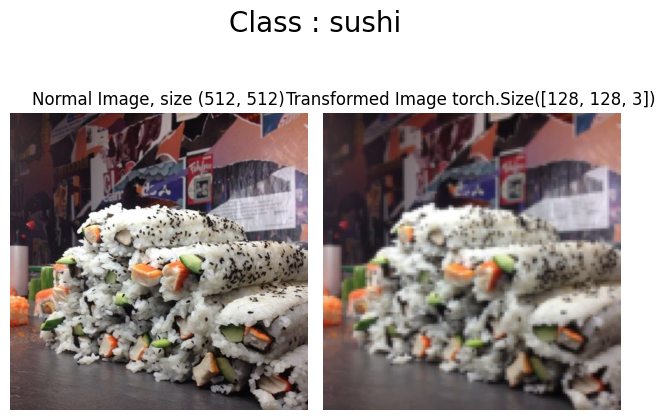

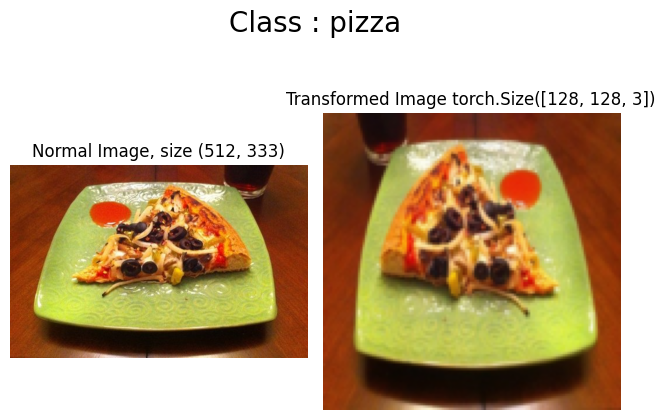

In [13]:
def plot_transformed_image(image_paths,transform,n=3,seed=None):
    random.seed(seed)
    image_path_list = random.sample(image_paths,k=n)

    for path in image_path_list:
        with Image.open(path) as img:
            fig,axes = plt.subplots(nrows=1,ncols=2)

            fig.suptitle(f"Class : {path.parent.stem}",fontsize=20)
            axes[0].set_title(f"Normal Image, size {img.size}")
            axes[0].imshow(img)
            axes[0].axis(False)

            transformed_image = torch.permute(input=transform(img), dims=(1, 2, 0))
            axes[1].set_title(f"Transformed Image {transformed_image.size()}")
            axes[1].imshow(transformed_image)
            axes[1].axis(False)
            plt.tight_layout()

plot_transformed_image(image_paths=image_path_list, transform=data_transform)

In [14]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)

test_data = datasets.ImageFolder(
    root=test_dir, transform=data_transform, target_transform=None
)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToDtype(scale=True)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToDtype(scale=True)
            ))

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
len(train_data),len(test_data)

(225, 75)

In [18]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

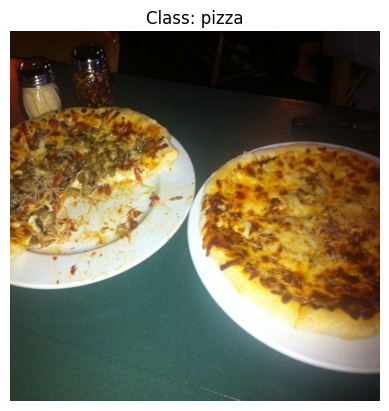

In [19]:
train_data.samples[0][0]

with Image.open(train_data.samples[0][0]) as f:
    plt.title(f"Class: {class_names[train_data.samples[0][1]]}")
    plt.imshow(f)
    plt.axis(False)

(-0.5, 127.5, 127.5, -0.5)

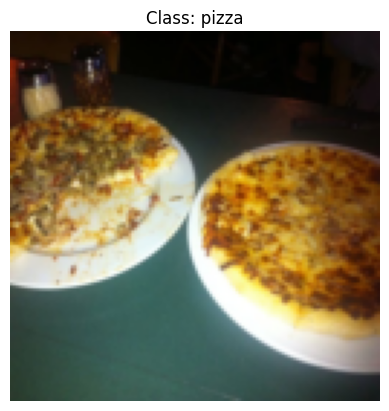

In [20]:
img,label = train_data[0][0], train_data[0][1]
plt.title(f"Class: {class_names[label]}")
plt.imshow(img.permute((1,2,0)))
plt.axis(False)

In [21]:
from torch.utils.data import DataLoader
import os


BATCH_SIZE = 32


train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, num_workers=os.cpu_count(), batch_size=BATCH_SIZE
)

In [22]:
print(
    f"Train data has {len(train_dataloader)} batches with {train_dataloader.batch_size} batch size"
)
print(
    f"Test data has {len(test_dataloader)} batches with {test_dataloader.batch_size} batch size"
)

Train data has 8 batches with 32 batch size
Test data has 3 batches with 32 batch size


In [23]:
img, label = next(iter(train_dataloader))

In [24]:
print(f'Image shape {img.shape}')
print(f"Label shape {label.shape}")

Image shape torch.Size([32, 3, 128, 128])
Label shape torch.Size([32])


In [25]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [26]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:


    classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i,cls_name in enumerate(classes)}

    return classes,class_to_idx

In [27]:
classes, class_to_idx = find_classes(train_dir)
classes,class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self,target_dir: str,transform=None) -> None:
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

        self.transform = transform

        self.classes,self.class_to_idx = find_classes(target_dir)

    def load_image(self,index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor,int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img),class_idx
        else: 
            return img,class_idx

In [29]:
img,label = train_data[0]
len(train_data)

225

In [30]:
from torchvision.transforms import v2

train_transforms = transforms.Compose(
    [
        v2.ToImage(),
        v2.Resize(size=(64, 64)),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

test_transforms = transforms.Compose(
    [
        v2.ToPILImage(),
        v2.Resize(size=(64,64)),
        v2.ToDtype(torch.float32)
    ]
)

In [31]:
train_data_custom = ImageFolderCustom(train_dir, train_transforms)
test_data_custom = ImageFolderCustom(test_dir, test_transforms)

print(f"Custom Image Folder : {len(train_data_custom)}, {len(test_data_custom)}")
print(f"Pytorch Image Folder : {len(train_data)}, {len(test_data)}")

Custom Image Folder : 225, 75
Pytorch Image Folder : 225, 75


In [32]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [33]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [34]:
def display_random_images(dataset:torch.utils.data.Dataset,classes: List[str],n: int=10,display_shape:bool=True,seed:int=None):

    if n >= 10:
        n = 10
        display_shape = False

    if seed:
        random.seed(seed)

    random_sample_idx = random.sample(range(len(dataset)),k=n)

    plt.figure(figsize=(16,8))
    for i,targ_sample in enumerate(random_sample_idx):
        targ_img, targ_label = dataset[targ_sample][0],dataset[targ_sample][1]

        adj_img = targ_img.permute((1,2,0))
        if n > 5:
            plt.subplot(3,n,i+1)
        else:
            plt.subplot(2, n, i + 1)
        plt.imshow(adj_img)
        plt.axis(False)
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title += f"\n Shape: {adj_img.shape}"
        plt.title(title)
    
    plt.tight_layout()

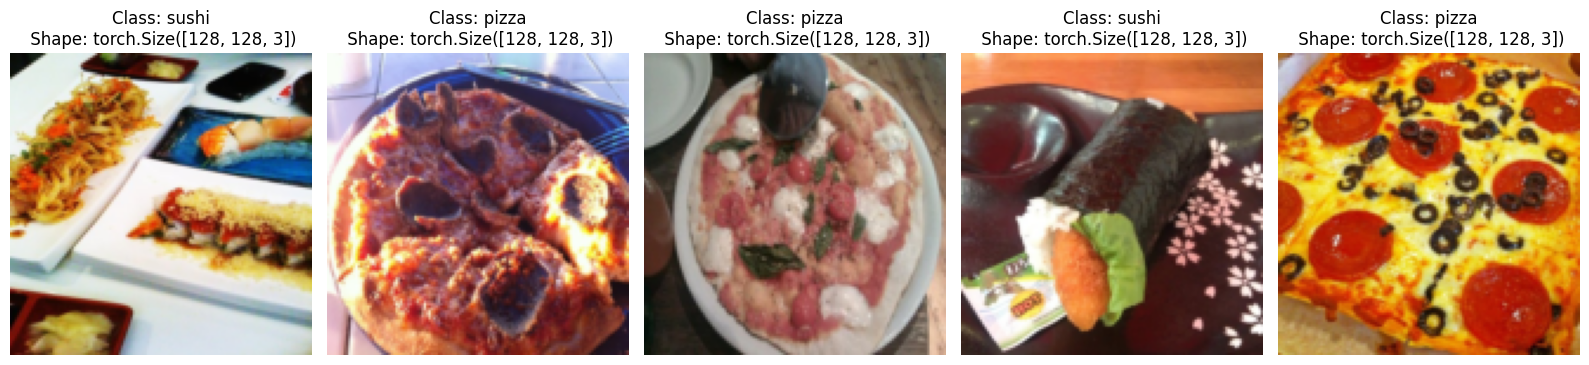

In [35]:
display_random_images(train_data,train_data.classes,5,True,42)

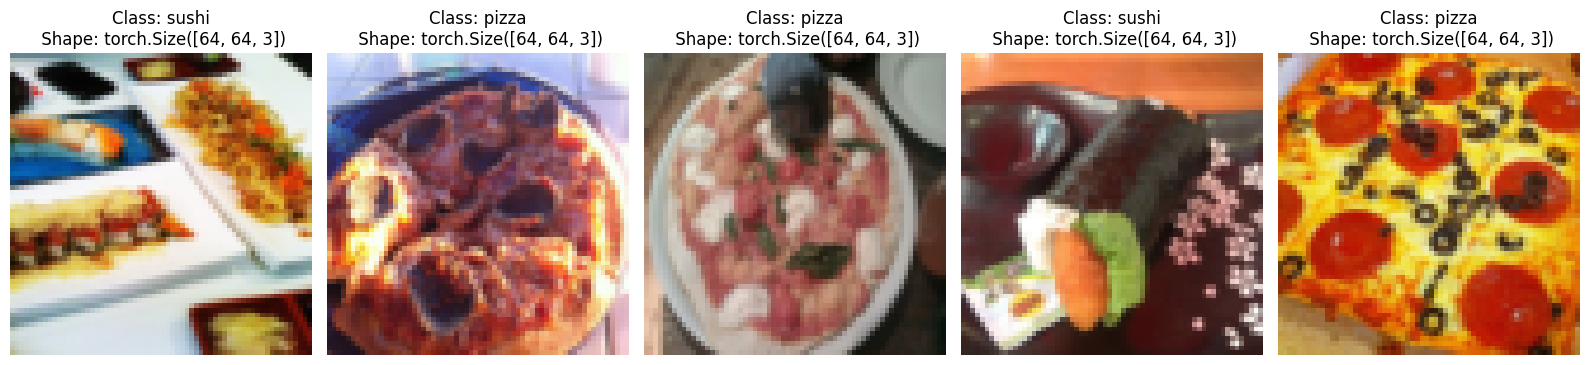

In [36]:
display_random_images(train_data_custom,train_data_custom.classes,5,True,42)

In [ ]:
BATCH_SIZE = 32

In [50]:
train_dataloader_custom = DataLoader(
    train_data_custom, batch_size=BATCH_SIZE, shuffle=True, num_workers=0
)

test_dataloader_custom = DataLoader(
    test_data_custom, batch_size=BATCH_SIZE, num_workers=0
)

len(train_dataloader_custom),len(test_dataloader_custom)

(8, 3)

In [51]:
img_custom,label_custom = next(iter(train_dataloader_custom))

In [56]:
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [65]:
from torchvision.transforms import v2 

train_transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize(size=(224,224)),
    v2.TrivialAugmentWide(num_magnitude_bins=31),
    v2.ToDtype(torch.float32,scale=True)
])

test_transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize(size=(224,224)),
    v2.TrivialAugmentWide(num_magnitude_bins=31),
    v2.ToDtype(torch.float32,scale=True)
])

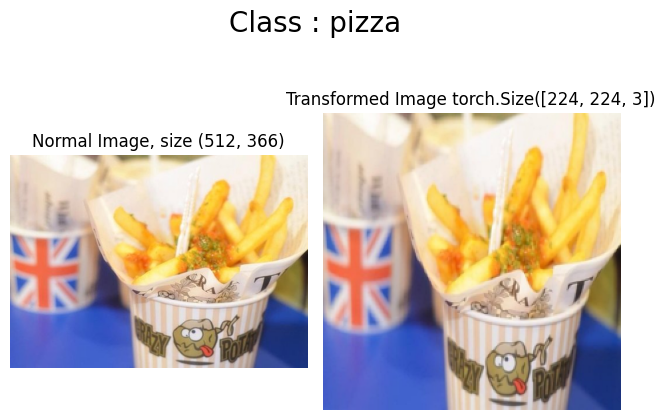

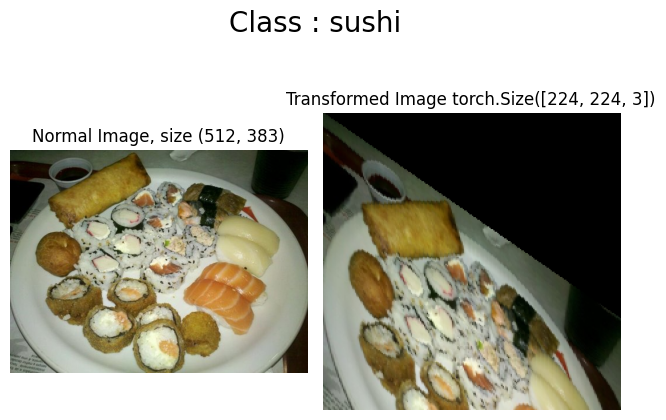

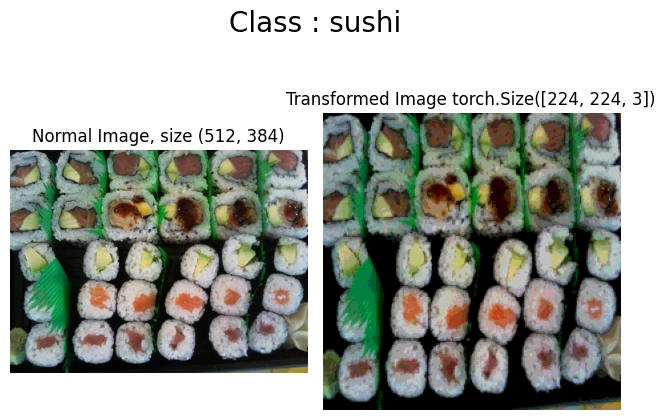

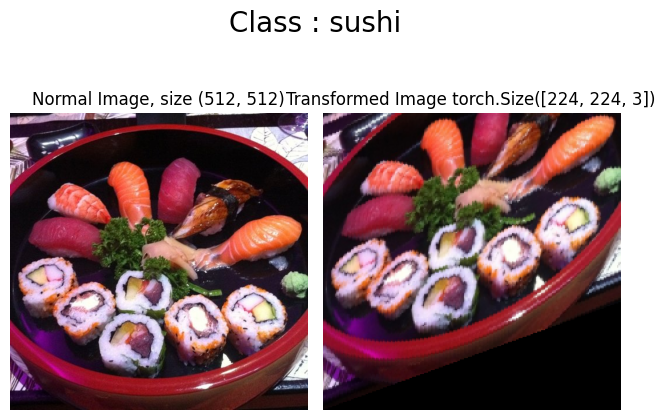

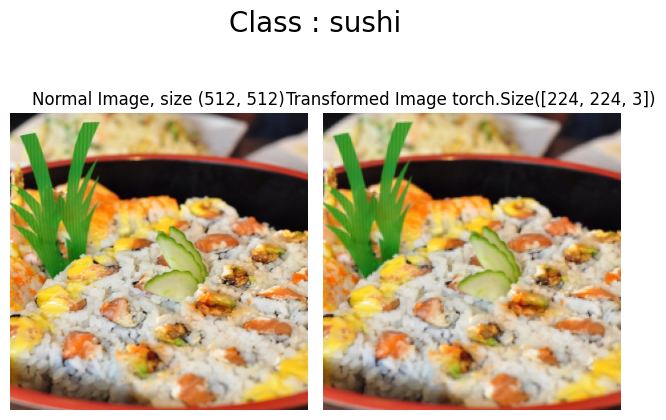

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_images = random.sample(image_path_list,k=5)

plot_transformed_image(random_images,train_transforms,5)
